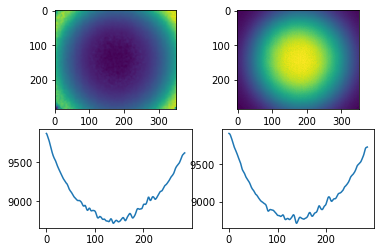

In [11]:
import numpy as np
import csv
import png
from matplotlib import pyplot as plt
import cv2 as cv



with open('../software/ampl.txt', newline='') as csvfile:
    data = list(csv.reader(csvfile,  delimiter=';'))

amplraw = np.array(data)
amplraw = amplraw.astype(np.uint16)
ampl = np.zeros((286*352),dtype=float)
ampl[:] = (((amplraw[0,:])))#-np.amin(amplraw).astype(float)))/(np.amax(amplraw)-np.amin(amplraw))).astype(float)
ampl = ampl.reshape((286,352))


with open('../software/radial.txt', newline='') as csvfile:
    data = list(csv.reader(csvfile,  delimiter=';'))

radialraw = np.array(data)
radialraw = radialraw.astype(np.uint16).reshape((286,352))
radial = np.zeros((286*352),dtype=float).reshape((286,352))
radial[:,:] = cv.GaussianBlur(radialraw,[0, 0],2)

plt.subplot(221)
plt.imshow(radial, interpolation='nearest')
plt.subplot(222)
plt.imshow(ampl, interpolation='nearest')
plt.subplot(223)
plt.plot(radial[:,176])
plt.subplot(224)
plt.plot(radial[:,143])
plt.show()
